<a href="https://colab.research.google.com/github/kgorfu/MyCode/blob/master/TRAIN_AWS_Part_II_Day_8_Notebook_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day 8: Embeddings**
---

### **Description**
In today's lab, we have another text classification task, but this time we will be using **embeddings.** For this project, we will be working with a dataset of BBC News articles classified by topic.

<br>

### **Lab Structure**

**Part 1**: [Review](#p1)
>
>**Part 1.1**: [Tokenization and Vectorization with sklearn](#p1.1)
>
>**Part 1.2**: [Tokenization and Vectorization with TextDataLoaders](#p1.2)

**Part 2**: [Embeddings](#p2)


**Part 3**: [News Classification with a Simple Neural Net with Embedding](#p3)

**Part 4**: [News Classification with a CNN with Embedding](#p4)

**Part 5**: [[ADDITIONAL PRACTICE] Sentiment Analysis with IMDB Movie Review](#p5)

<br>

### **Goals**
By the end of this lab, you will:
* Understand how tokenization and vectorization works when using TextDataLoaders
* Understand how to apply embedding layers in models.
* Compare a fully connected network to a CNN for text classification with embeddings.

<br>

### **Cheat Sheets**
[Natural Language Processing II](https://docs.google.com/document/d/1OoP-sFW6qMk0BzvYMlavgJtiXX9eziTUptlFdzgLfGk/edit)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from fastai.text.all import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0

<a name="p1"></a>

---
## **Part 1: Review**
---



<a name="p1.1"></a>

---
### **Part 1.1: Tokenization and Vectorization with sklearn**
---

**Run the cell below to load a simple corpus for us to work with.**

In [2]:
# Define a collection of text documents
corpus = [
       "One Cent, Two Cents, Old Cent, New Cent: All About Money (Cat in the Hat's Learning Library",
       "Inside Your Outside: All About the Human Body (Cat in the Hat's Learning Library)",
       "Oh, The Things You Can Do That Are Good for You: All About Staying Healthy (Cat in the Hat's Learning Library)",
       "On Beyond Bugs: All About Insects (Cat in the Hat's Learning Library)",
       "There's No Place Like Space: All About Our Solar System (Cat in the Hat's Learning Library)"
]

#### **Problem #1.1.1: Create a CountVectorizer object**



In [3]:
vectorizer = CountVectorizer() #FILL IN CODE HERE

#### **Problem #1.1.2: Fit the vectorizer to the corpus**



In [4]:
vectorizer.fit(corpus)

CountVectorizer()

#### **Problem #1.1.3: Transform the corpus into a matrix of token counts**



In [5]:
# Transform the corpus into a matrix of token counts
# WRITE YOUR CODE HERE
X = vectorizer.transform(corpus)
# Print the resulting matrix
print(X.toarray())

[[1 1 0 0 0 0 0 1 3 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0
  0 1 0 0 1 0 0]
 [1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 2 0 0 0 0 1]
 [1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
  1 2 0 1 0 2 0]
 [1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0]
 [1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1
  0 1 1 0 0 0 0]]


#### **Problem #1.1.4: Print the tokens**

Use `get_feature_names_out()` to print the tokens.


In [6]:
print(vectorizer.get_feature_names_out())

['about' 'all' 'are' 'beyond' 'body' 'bugs' 'can' 'cat' 'cent' 'cents'
 'do' 'for' 'good' 'hat' 'healthy' 'human' 'in' 'insects' 'inside'
 'learning' 'library' 'like' 'money' 'new' 'no' 'oh' 'old' 'on' 'one'
 'our' 'outside' 'place' 'solar' 'space' 'staying' 'system' 'that' 'the'
 'there' 'things' 'two' 'you' 'your']


Compare the tokens, the matrix, and the corpus. Do you see how each sentence is represented in the matrix?

<a name="p1.2"></a>

---
### **Part 1.2: Tokenization and Vectorization with TextDataLoaders**
---

Last time, we learned how to tokenize and vectorize data using `sklearn`'s `CountVectorizer()`. However, we don't always have to do this step manually. When loading data with fast.ai's `TextDataLoaders`, the DataLoader handles the tokenization and vectorization for us. Let's take a look.

**Run the code below to load the BBC News data into a pandas DataFrame.**


In [7]:
dataset = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRRiQ1DUkUxk31YpaHA2i9QtwGq_VGXiy86z7l3aT9v5zoB6M7a-2M2qlYckr1C_ZG6StBELlU_hD3S/pub?output=csv')

#### **Problem #1.2.1: Load the data using TextDataLoaders**

Use the following parameters:
* `dataset`
* `text_col='text'`
* `label_col='category'`
* `valid_pct=0.2`
* `bs=64`
* `seq_len=100`


In [8]:
dls = TextDataLoaders.from_df(
    #FILL IN CODE HERE
    dataset,
    text_col='text',
    label_col='category',
    valid_pct=0.2,
    bs=64,
    seq_len=100
)

#### **Problem #1.2.2: Print the vocabulary**


The `vocab` attribute of the DataLoaders object contains the vocabulary of the data and of the labels.

Use the first element of the `vocab` attribute of the DataLoaders object to print the vocabulary of the data.

In [9]:
 print(dls.vocab[0])
 print(len(dls.vocab[0]))

['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld', 'xxrep', 'xxwrep', 'xxup', 'xxmaj', 'mr', 'm', 'people', '3', 'new', '£', '0', 't', 'government', 'year', 'uk', 'film', 'best', 'world', 'music', 'labour', 'game', '1', '2', 'election', 'time', 'blair', 'party', 'mobile', 'market', 'like', 'england', 'games', 'years', 'company', 'tv', 'told', '6', 'sales', 'brown', 'technology', 'home', 'win', 'bbc', 'firm', 'says', 'million', 'economy', 'play', 'tax', '2004', 'number', 'public', 'net', 'british', 'digital', 'won', 'use', 'users', 'players', 'set', 'country', 'think', 'wales', 'minister', 'software', 'phone', 'bank', 'good', 'high', 'economic', '4', 'services', 'growth', 'said', 'group', 'club', 'report', 'european', 'howard', 'system', 'video', 'work', 'firms', 'france', '5', 'law', 'information', 'online', 'court', 'ireland', 'way', 'computer', 'radio', 'service', 'prime', 'united', 'going', 'data', 'china', 'day', 'security', 'o', '9', 'campaign', 'awards', 'second', 'want', 'right', 'mo

#### **Problem #1.2.3: Print the labels**


Use the second element of the `vocab` attribute to print the labels.

In [10]:
print(dls.vocab[1])

['business', 'entertainment', 'politics', 'sport', 'tech']


#### **Problem #1.2.4: View vectorized data**
---

TextDataLoaders assigns a unique integer ID to each token in the vocabulary, while preserving the order of the tokens.

Use `dls.one_batch()` to pull one batch of the data and view the first instance.

In [11]:
#xb, yb = dls.one_batch() # FILL IN CODE HERE
#print(xb[0])
xb, yb = dls.one_batch()
print(xb[0])

TensorText([   2, 1246,   92,  ..., 2583,  927,    0], device='cuda:0')


#### **Problem #1.2.5: Decode vectorized data**
---

Use `dls.show()` to decode the numeric data.

*Hint: Pass a tuple to the function.*

In [12]:
dls.show((xb[0], yb[0]))

xxbos losing online gaming online role playing games time consuming xxunk flights reality people fantasy lives seriously video game world warcraft shops week fans wrote website express delight warning addiction game like far costly time substance xxunk track time wrote travis anderson texas comments humorous game good m going way limit hours d spend playing wrote xxunk struck worrying tone massively multiplayer online role playing game mmorpg need motto mmorpg shame getting know problem going xxunk wrote stuart xxunk davies xxunk scare xxunk articles addictive video games existed days game xxunk stopped atari offices gaming like xxunk quickly unhealthy obsession spending time gym television reading poetry unfortunately gaming addiction far easy stories gamers spending 10 15 hours day video games frequent impact having families distressing massively multiplayer online role playing games mmorpgs allow thousands gamers common experience sharing fantasy science fiction worlds scope games l

---

<center>

#### **Back to lecture**

---

<a name="p2"></a>

---
## **Part 2: Embeddings**
---

#### **Problem #2.1: Create an embedding layer in PyTorch**


We can use PyTorch to create embeddings. Create an embedding layer. The first input will be the vocab size, and the second input is the embedding dimension. Set the embedding dimension to 50.

In [13]:
# Create an embedding layer with 50 dimensions
#vocab_size = len(dls.vocab# FILL IN CODE HERE
#embedding = nn.Embedding(vocab_size, # FILL IN CODE HERE)
vocab_size = len(dls.vocab[0])
embedding_dim = 50
embedding = nn.Embedding(vocab_size, embedding_dim).to(device)

#### **Problem #2.2: Apply the embedding**


Earlier, we pulled one batch of the data and saved the data `xb` and labels `yb`. Apply the embedding to the batch of data `xb`. Compare this numerical representation to the representation in Problem #4.

In [14]:
# Apply the embedding layer
embedded = embedding(xb)

# Print the first embedded instance of the data
print(embedded[0])
embedded[0].size()

TensorText([[-1.1890,  1.5346, -0.3551,  ..., -1.6393, -2.5368, -1.4364],
            [-0.5957,  0.8081,  1.1955,  ..., -1.5520, -0.5316, -0.6303],
            [ 1.0140,  0.1753, -0.3008,  ...,  1.6766,  0.2298,  0.7366],
            ...,
            [-0.0542,  0.4725,  1.2037,  ..., -1.4270, -0.7556, -0.7625],
            [ 0.1009, -1.3908, -0.3509,  ..., -0.5594,  0.8494,  0.5889],
            [-0.0538, -1.3501, -0.8661,  ...,  0.3099, -0.3944, -0.4032]],
           device='cuda:0', grad_fn=<AliasBackward0>)


torch.Size([1246, 50])

#### **Run the code below to visualize the embedding.**

You can change the first and second dimension for plotting.

In [16]:
first_dimension = 0
second_dimension = 1

# Detach the tensor from the computational graph (preparing for plotting)
embedded = embedded.detach()

# Plot the embeddings
plt.figure(figsize=(10, 10))
plt.scatter(
    embedded[:, :, first_dimension].numpy().flatten(),
    embedded[:, :, second_dimension].numpy().flatten(),
    s=10)
plt.title('Embedding Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

<Figure size 1000x1000 with 0 Axes>

---

<center>

#### **Back to lecture**

---

<a name="p3"></a>

---
## **Part 3: News Classification with a Simple Neural Net with Embedding**
---

#### **Problem #3.1**



Fill in the code below for a fully connected network of your own design. Ensure you have the correct number of inputs and outputs.

Set the embedding dimension to 200.

In [17]:
embed_size = 200 # FILL IN CODE HERE

model = nn.Sequential(
     # FILL IN CODE HERE
    nn.Embedding(vocab_size, embed_size),
    nn.AdaptiveAvgPool2d((1, embed_size)),
    nn.Flatten(),
    nn.Linear(embed_size, 100), # FILL IN CODE HERE
     nn.ReLU(),
     nn.Linear(100, 5), # FILL IN CODE HERE
    # ADD THE REST OF YOUR LAYERS
)

#### **Problem #3.2**

Create a Learner object and fit the model. Since this is a multiclass classification problem, you will use `nn.CrossEntropyLoss()` and accuracy as the metric. Choose your own hyperparameters (5 epochs and a learning rate of 0.001 is a good start.)

In [18]:
# Create a Learner and train the model
learn = Learner(
    dls,
    model,
    loss_func=nn.CrossEntropyLoss(),
    metrics=accuracy)
learn.fit(10, lr=0.001)

epoch,train_loss,valid_loss,accuracy,time
0,1.583630,1.548966,0.382022,00:02
1,1.509750,1.452570,0.521348,00:02
2,1.390702,1.277549,0.662921,00:02
3,1.203030,1.073765,0.712360,00:02
4,0.991467,1.081549,0.741573,00:03
5,0.798627,0.696727,0.815730,00:02
6,0.620797,0.817688,0.820225,00:02
7,0.482495,0.725640,0.813483,00:02
8,0.379995,0.704447,0.822472,00:02
9,0.303797,0.467668,0.840449,00:03


#### **Problem #3.3**

Now, evaluate the model for both the training and validation sets.


In [19]:
# Evaluate the training set
train_loss, train_accuracy = learn.validate(dl=dls.train)
print(f"Training accuracy: {train_accuracy}")

# Evaluate the test set
valid_loss, validate_accuracy = learn.validate(dl=dls.valid)
print("Validation accuracy: ", validate_accuracy)


Training accuracy: 0.9670138955116272


Validation accuracy:  0.8404494524002075


#### **How did your model perform? Try to improve your result with hyperparameter tuning.**




---

<center>

#### **Back to lecture**

---

<a name="p4"></a>

---
## **Part 4: News Classification with a CNN with Embedding**
---



#### **Problem #4.1**


Let's build a CNN model with an embedding layer. In order for the output of the embedding layer to be the right dimensions for the convolutional layer, we've provided a custom module that transposes the last two dimensions.

Remember, we've introduced a new version of the max pooling layer. The previous one specifies the pool size, and requires us to keep track of the output sizes:
* `nn.MaxPool1d(2)`

For the new one, we just specify what size *output* we would like:
* `nn.AdaptiveMaxPool1d(10)`

<br>

Define a CNN with the following layers:

Block 1:
* A convolutional layer with 300 outputs, kernel size of 11, `padding='same'`, and ReLU activation.
* A adaptive max pooling layer with an output size of 10

Block 2
* A convolutional layer with 150 outputs, kernel size of 11, `padding='same'`, and ReLU activation.
* A adaptive max pooling layer with an output size of 1

Finally, add:
* A Flatten layer
* A linear layer with 20 outputs and ReLU activation
* The output layer

In [20]:
# To prepare the embedding layer for the convolutional layer, we need
# to define a custom module to transpose the last two dimensions.
class Transpose(nn.Module):
    def forward(self, x):
        return x.transpose(1, 2)

model = nn.Sequential(
    nn.Embedding(vocab_size, embed_size),
    Transpose(),
    #block 1
    nn.Conv1d(embed_size, 300, kernel_size = 11, padding = 'same'), # FILL IN CODE HERE
    nn.ReLU(),
    nn.AdaptiveMaxPool1d(10), # FILL IN CODE HERE
    #block 2
    nn.Conv1d(300, 150,kernel_size = 11, padding = 'same'), # FILL IN CODE HERE
    nn.ReLU(),
    nn.AdaptiveMaxPool1d(1),
    nn.Flatten(), # ADD THE REST OF THE LAYERS
    nn.Linear(150, 20),
    nn.ReLU(),
    nn.Linear(20, 5)
    # ADD THE REST OF THE LAYERS
)


#### **Problem #4.2**


Create a Learner object and fit the model. Since this is a multiclass classification problem, you will use `nn.CrossEntropyLoss()`

epoch,train_loss,valid_loss,accuracy,time
0,1.653063,1.597301,0.289888,00:04
1,1.458260,1.484750,0.404494,00:02
2,1.100314,0.898996,0.640449,00:02
3,0.698032,0.662336,0.797753,00:02
4,0.429373,0.990854,0.739326,00:02
5,0.285973,0.611115,0.811236,00:03
6,0.176799,0.434064,0.869663,00:02
7,0.104195,0.412510,0.885393,00:03
8,0.061011,0.412071,0.887640,00:02
9,0.035919,0.404911,0.889888,00:03


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

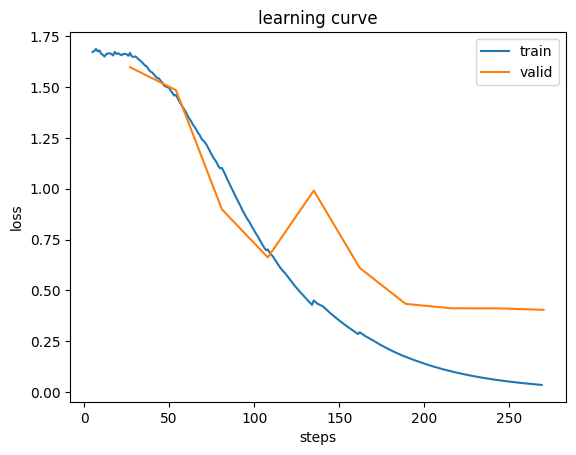

In [21]:
# Create a Learner and train the model
learn = Learner(
    dls,
    model,
    loss_func=nn.CrossEntropyLoss(),
    metrics=accuracy,
    opt_func=Adam
)
learn.fit(10, lr=0.001)

learn.recorder.plot_loss()

#### **Problem #4.3**


Now, evaluate the model for both the training and validation sets.


In [22]:
# Evaluate the training set
train_loss, train_accuracy = learn.validate(dl=dls.train)
print(f"Training accuracy: {train_accuracy}")

# Evaluate the test set
valid_loss, validate_accuracy = learn.validate(dl=dls.valid)
print("Validation accuracy: ", validate_accuracy)


Training accuracy: 1.0


Validation accuracy:  0.8898876309394836


#### **How did your model perform? Try to improve your result with hyperparameter tuning.**

<a name="p5"></a>

---
## **[ADDITIONAL PRACTICE] Part 5: Sentiment Analysis with IMDB Movie Reviews**
---

In this part, we will create a CNN using the IMDB Movie Reviews dataset, which includes movie reviews along with their corresponding sentiment (positive, neutral, negative).

####**Problem #5.1**

**Run the code below to load the IMDB Movie Reviews data into a pandas DataFrame.**

View the DataFrame before beginning.


In [23]:
dataset = pd.read_csv('https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/imdb_reviews/IMDB_Dataset.csv')

dataset.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses main...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his ...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've ...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with so...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of conta...",positive


#### **Problem #5.2: Load the data using TextDataLoaders**

Use the following parameters:
* `dataset`
* `text_col='review'`
* `label_col='sentiment'`
* `valid_pct=0.2`
* `bs=64`
* `seq_len=100`


In [ ]:
dls = TextDataLoaders.from_df(
    #FILL IN CODE HERE
)

#### **Problem #5.3: Print the vocabulary**


The `vocab` attribute of the DataLoaders object contains the vocabulary of the data and of the labels.

Use the first element of the `vocab` attribute of the DataLoaders object to print the vocabulary of the data.

#### **Problem #5.4: Print the labels**


Use the second element of the `vocab` attribute to print the labels.

#### **Problem #5.5: View vectorized data**


TextDataLoaders assigns a unique integer ID to each token in the vocabulary, while preserving the order of the tokens.

Use `dls.one_batch()` to pull one batch of the data and view the first instance.

In [ ]:
xb, yb = # FILL IN CODE HERE

#### **Problem #5.6: Decode vectorized data**


Use `dls.show()` to decode the numeric data.

*Hint: Pass a tuple to the function.*

#### **Problem #5.7: Create an embedding layer in PyTorch**


We can use PyTorch to create embeddings. Create an embedding layer. The first input will be the vocab size, and the second input is the embedding dimension. Set the embedding dimension to 50.

In [ ]:
# Create an embedding layer with 50 dimensions
vocab_size = # FILL IN CODE HERE
embedding = nn.Embedding(vocab_size, # FILL IN CODE HERE)

#### **Problem #5.8: Apply the embedding**


Earlier, we pulled one batch of the data and saved the data `xb` and labels `yb`. Apply the embedding to the batch of data `xb`. Compare this numerical representation to the representation in Problem #4.

In [ ]:
# Apply the embedding layer
embedded = # FILL IN CODE HERE

# Print the first embedded instance of the data
embedded[0]

#### **Run the code below to visualize the embedding.**

You can change the first and second dimension for plotting.

In [ ]:
first_dimension = 0
second_dimension = 1

# Detach the tensor from the computational graph (preparing for plotting)
embedded = embedded.detach()

# Plot the embeddings
plt.figure(figsize=(10, 10))
plt.scatter(
    embedded[:, :, first_dimension].numpy().flatten(),
    embedded[:, :, second_dimension].numpy().flatten(),
    s=10)
plt.title('Embedding Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

#### **Problem #5.9**


Let's build a CNN model with an embedding layer. In order for the output of the embedding layer to be the right dimensions for the convolutional layer, we've provided a custom module that transposes the last two dimensions.

Remember, we've introduced a new version of the max pooling layer. The previous one specifies the pool size, and requires us to keep track of the output sizes:
* `nn.MaxPool1d(2)`

For the new one, we just specify what size *output* we would like:
* `nn.AdaptiveMaxPool1d(10)`

<br>

Define a CNN with the following layers:

Block 1:
* A convolutional layer with 300 outputs, kernel size of 11, `padding='same'`, and ReLU activation.
* A adaptive max pooling layer with an output size of 10

Block 2
* A convolutional layer with 150 outputs, kernel size of 11, `padding='same'`, and ReLU activation.
* A adaptive max pooling layer with an output size of 1

Finally, add:
* A Flatten layer
* A linear layer with 20 outputs and ReLU activation
* The output layer

In [ ]:
# To prepare the embedding layer for the convolutional layer, we need
# to define a custom module to transpose the last two dimensions.
class Transpose(nn.Module):
    def forward(self, x):
        return x.transpose(1, 2)

model = nn.Sequential(
    nn.Embedding(vocab_size, embed_size),
    Transpose(),
    nn.Conv1d(embed_size, # FILL IN CODE HERE
    # ADD THE REST OF THE LAYERS
)


#### **Problem #5.10**


Create a Learner object and fit the model. Since this is a multiclass classification problem, you will use `nn.CrossEntropyLoss()`

In [ ]:
# Create a Learner and train the model


#### **Problem #5.11**


Now, evaluate the model for both the training and validation sets.


In [ ]:
# Evaluate the training set


# Evaluate the test set


---
#End of notebook
---
© 2024 The Coding School, All rights reserved